In [ ]:
#setup and load date

In [ ]:
1.1 #install dependencies and setup

In [1]:
import tensorflow as tf

import os

In [2]:

import numpy as np
import pandas as pd

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
os.listdir('/content/drive/MyDrive/workout_img/test_dataset/train')

['bench', 'deadlift', 'squat']

In [ ]:
1.2#Remove dodgy images

In [7]:
data_dir_train = '/content/drive/MyDrive/workout_img/test_dataset/train'

In [8]:
len(os.listdir(os.path.join(data_dir_train,'squat')))

196

In [9]:
len(os.listdir(os.path.join(data_dir_train,'deadlift')))

198

In [10]:
len(os.listdir(os.path.join(data_dir_train,'bench')))

160

In [11]:
for image_class in os.listdir(data_dir_train):
  print(image_class)

bench
deadlift
squat


In [12]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from PIL import Image

In [13]:
def load_im_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/MyDrive/workout_img/test_dataset/train'
    elif loading_method == 'direct':
        data_path = 'flowers/'
    classes = {'bench':0,'deadlift':1,'squat':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:150]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path).convert('RGB')
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    # first_split = int(len(imgs) /7.)
    # second_split = first_split + int(len(imgs) * 0.2)
    # X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    # y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    # return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

    return X,y,num_classes

In [ ]:
# X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_im_data('colab')

In [14]:
X,y,num_classes = load_im_data('colab')

100%|██████████| 150/150 [00:05<00:00, 29.65it/s]


In [15]:
num_classes

3

In [16]:
from sklearn.model_selection import train_test_split
#one line
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

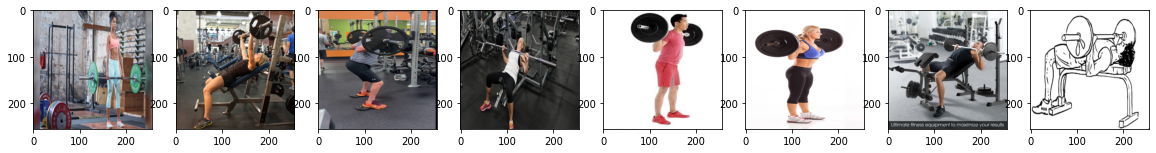

In [45]:
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i])

In [17]:
print(X_train.shape, X_test.shape)

(360, 256, 256, 3) (90, 256, 256, 3)


In [18]:
#deep learning 
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [19]:
#model 1 
def model_1():
  model = Sequential()
  model.add(Rescaling(1./255, input_shape=(256,256,3)))

  model.add(layers.Conv2D(64, kernel_size=10, activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(64, kernel_size=8, activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Dropout(0.3))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(3, activation='softmax'))
  
  #opt = optimizers.Adam(learning_rate=0.001)
  
  model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

In [20]:
model = model_1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 247, 247, 64)      19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 123, 123, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 116, 64)      262208    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                    

In [21]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 10,
                   verbose=1,
                   restore_best_weights = True)

history = model.fit(X_train,y_train,validation_split=0.2, batch_size=16,epochs=100, callbacks=[es])

Epoch 1/100
18/18 [==============================] - 230s 13s/step - loss: 3.2021 - accuracy: 0.3056 - val_loss: 1.0996 - val_accuracy: 0.2917
Epoch 2/100
18/18 [==============================] - 239s 13s/step - loss: 1.0978 - accuracy: 0.3646 - val_loss: 1.1000 - val_accuracy: 0.2917
Epoch 3/100
18/18 [==============================] - 238s 13s/step - loss: 1.0985 - accuracy: 0.3403 - val_loss: 1.0999 - val_accuracy: 0.2917
Epoch 4/100


KeyboardInterrupt: ignored

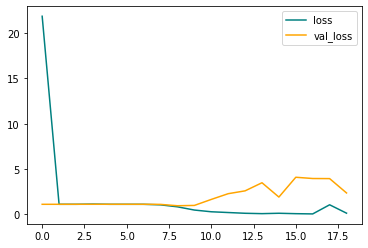

In [236]:
fig = plt.figure()
plt.plot(history.history['loss'],color = 'teal',label = 'loss')
plt.plot(history.history['val_loss'],color = 'orange',label = 'val_loss')
plt.legend()
plt.show()

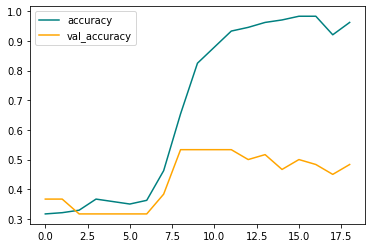

In [237]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'orange',label = 'val_accuracy')
plt.legend()
plt.show()

In [ ]:
#CNN model 1

In [35]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_own_model():
  model = Sequential()

  model.add(Rescaling(1./255, input_shape=(256,256,3)))

  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.25))

  model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
  
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Flatten())

  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(3, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [40]:
model_homemade = load_own_model()
model_homemade.summary()

ResourceExhaustedError: ignored

In [ ]:
#data augmentation and fit

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)
    
history = model_homemade.fit(X_train,y_train,validation_split=0.3, epochs=80, callbacks=[es])
    

Epoch 1/50
7/7 [==============================] - 7s 857ms/step - loss: 1.6585 - accuracy: 0.4080 - val_loss: 1.1611 - val_accuracy: 0.3333
Epoch 2/50
7/7 [==============================] - 4s 528ms/step - loss: 1.3229 - accuracy: 0.5323 - val_loss: 1.6090 - val_accuracy: 0.3218
Epoch 3/50
7/7 [==============================] - 4s 528ms/step - loss: 0.8975 - accuracy: 0.6866 - val_loss: 2.2692 - val_accuracy: 0.2989
Epoch 4/50
7/7 [==============================] - 4s 569ms/step - loss: 0.9616 - accuracy: 0.5771 - val_loss: 2.0087 - val_accuracy: 0.3333
Epoch 5/50
7/7 [==============================] - 4s 585ms/step - loss: 0.7733 - accuracy: 0.6965 - val_loss: 1.9889 - val_accuracy: 0.3448
Epoch 6/50
7/7 [==============================] - 4s 571ms/step - loss: 0.7453 - accuracy: 0.6766 - val_loss: 1.7637 - val_accuracy: 0.4023
Epoch 7/50
7/7 [==============================] - 4s 527ms/step - loss: 0.5322 - accuracy: 0.7910 - val_loss: 1.8974 - val_accuracy: 0.3103
Epoch 8/50
7/7 [====

In [ ]:
#plot results

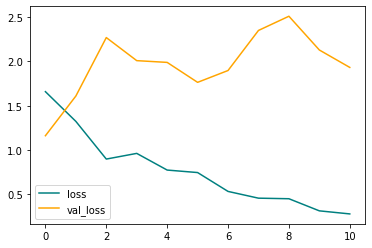

In [38]:
fig = plt.figure()
plt.plot(history.history['loss'],color = 'teal',label = 'loss')
plt.plot(history.history['val_loss'],color = 'orange',label = 'val_loss')
plt.legend()
plt.show()


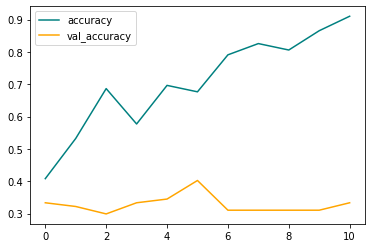

In [39]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'orange',label = 'val_accuracy')
plt.legend()
plt.show()

In [ ]:
#evaluate model

In [ ]:
res = model_homemade.evaluate(X_test, y_test)
res

2/2 [==============================] - 3s 970ms/step - loss: 1.0151 - accuracy: 0.5294


[1.0150582790374756, 0.529411792755127]

In [ ]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 53.0 %


In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
y_pred = model_homemade.predict(X_test)
pre.update_state(y_test,y_pred)
re.update_state(y_test,y_pred)
acc.update_state(y_test,y_pred)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=51.0>

In [ ]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.72727275, shape=(), dtype=float32) tf.Tensor(0.15686275, shape=(), dtype=float32) tf.Tensor(0.6993464, shape=(), dtype=float32)


In [ ]:
y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
y_pred

array([[0.42912117, 0.36175027, 0.20912859],
       [0.24167693, 0.64766115, 0.11066195],
       [0.32804745, 0.2473071 , 0.42464542],
       [0.3727887 , 0.30644554, 0.32076576],
       [0.3397324 , 0.38271314, 0.2775545 ],
       [0.3334367 , 0.3223253 , 0.344238  ],
       [0.34291798, 0.31090763, 0.3461744 ],
       [0.29768047, 0.35482296, 0.34749663],
       [0.3334367 , 0.3223253 , 0.344238  ],
       [0.33501837, 0.3152609 , 0.3497208 ],
       [0.31220886, 0.3323623 , 0.3554288 ],
       [0.5410396 , 0.31720877, 0.14175172],
       [0.3334367 , 0.3223253 , 0.344238  ],
       [0.37259167, 0.48048264, 0.1469257 ],
       [0.32566664, 0.43106094, 0.24327244],
       [0.3334367 , 0.3223253 , 0.344238  ],
       [0.33853564, 0.320849  , 0.3406154 ],
       [0.3334367 , 0.3223253 , 0.344238  ],
       [0.20228368, 0.5988254 , 0.19889091],
       [0.3325284 , 0.32352552, 0.34394607],
       [0.30045342, 0.35716978, 0.34237683],
       [0.33356932, 0.3222662 , 0.34416452],
       [0.

In [ ]:
4.2#test

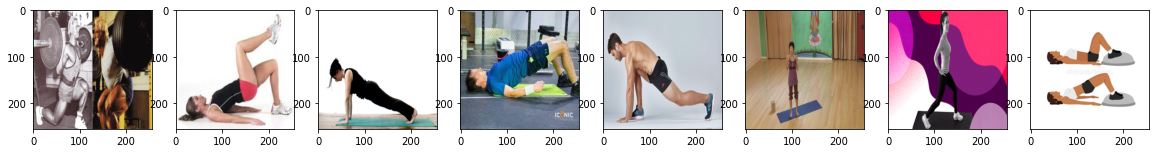

In [ ]:
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_test[i])

In [ ]:
#save model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('sample_data','imgmodel.h5'))

In [ ]:
new_model = load_model(os.path.join('sample_data','imgmodel.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255,0))

array([[0.9370359]], dtype=float32)